In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import (
    Dense, Conv2D, MaxPool2D, Dropout, Flatten, 
    BatchNormalization, GlobalAveragePooling2D
)

from keras.applications.densenet import DenseNet121
from keras import backend as K

from sklearn.metrics import confusion_matrix, classification_report

os.listdir("C:\\Users\\anjum\\OneDrive\\Desktop\\chest_xray")

C:\Users\anjum\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\anjum\anaconda3\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (2.2.1) or chardet (4.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn(


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\anjum\\OneDrive\\Desktop\\chest_xray'

In [10]:
len(os.listdir("C:\\Users\\anjum\\OneDrive\\Desktop\\chest_xray\\train\\NORMAL"))

1349

In [11]:
len(os.listdir("C:\\Users\\anjum\\OneDrive\\Desktop\\chest_xray\\train\\PNEUMONIA"))

3883

In [12]:
len(os.listdir("C:\\Users\\anjum\\OneDrive\\Desktop\\chest_xray\\test\\NORMAL"))

234

In [13]:
len(os.listdir("C:\\Users\\anjum\\OneDrive\\Desktop\\chest_xray\\test\\PNEUMONIA"))

390

In [14]:
train_dir = "C:\\Users\\anjum\\OneDrive\\Desktop\\chest_xray\\train"
test_dir = "C:\\Users\\anjum\\OneDrive\\Desktop\\chest_xray\\test"

In [15]:
print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
print(f"PNEUMONIA = {len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL = {len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")


Train set:
PNEUMONIA=3883
NORMAL=1349
Test set:
PNEUMONIA = 390
NORMAL = 234


In [37]:
pneumonia_train = os.listdir(os.path.join(train_dir, "PNEUMONIA"))
pneumonia_test = os.listdir(os.path.join(test_dir, "PNEUMONIA"))

In [38]:
pneumonia_dir = os.path.join(test_dir, "PNEUMONIA")

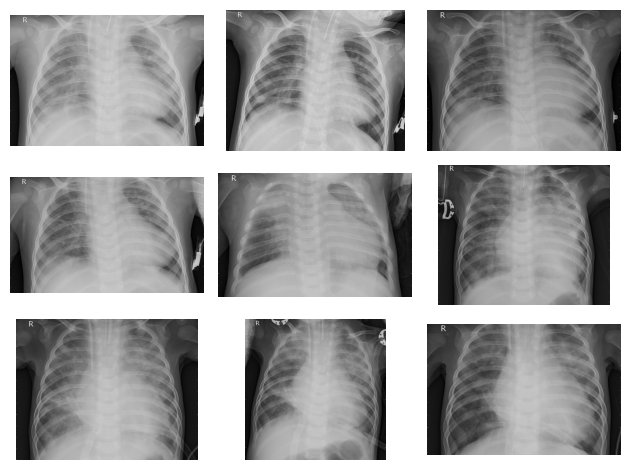

In [39]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia_test[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()
plt.show()

The dimensions of the image are 2476 pixels width and 2572 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 120.9381 and the standard deviation is 60.4879


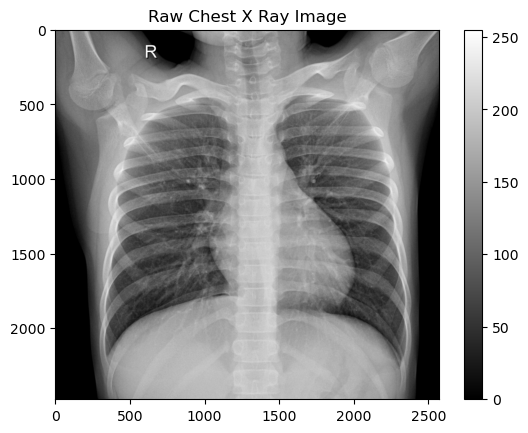

In [40]:
normal_img = os.listdir("C:\\Users\\anjum\\OneDrive\\Desktop\\chest_xray\\train\\NORMAL")[0]
normal_dir = "C:\\Users\\anjum\\OneDrive\\Desktop\\chest_xray\\train\\NORMAL"

sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

C:\Users\anjum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixels in Image')

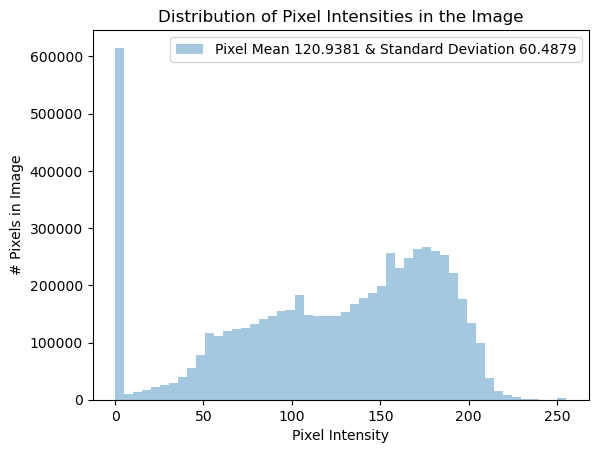

In [41]:
sns.distplot(sample_img.ravel(),
             label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", 
             kde=False)
plt.legend(loc='upper right')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [42]:
image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [44]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(320, 320))


test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(320, 320))

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 320 pixels width and 320 pixels height, one single color channel.
The maximum pixel value is 2.4144 and the minimum is -3.3624
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


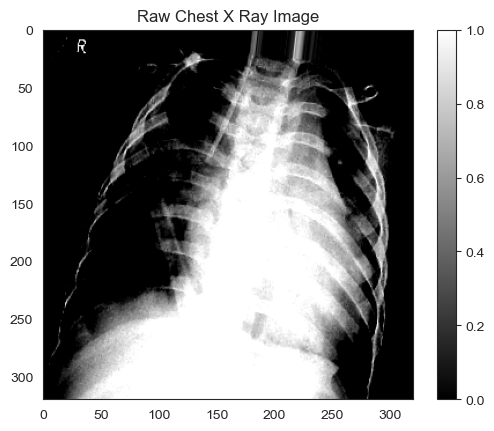

In [45]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

Text(0, 0.5, '# Pixels in Image')

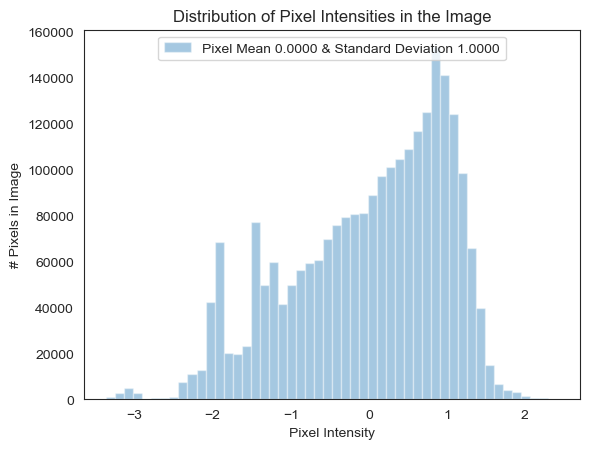

In [46]:
sns.distplot(generated_image.ravel(),
             label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", 
             kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [47]:
# Class weights

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


In [48]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(320, 320, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(320, 320, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 318, 318, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 318, 318, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 316, 316, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 316, 316, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 158, 158, 32)      0         
 D)                                                              
                                                        

In [52]:
r = model.fit(
    train, 
    epochs=10, 
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

Epoch 1/10


100/100 [==============================] - 177s 2s/step - loss: 3.3212 - accuracy: 0.7912
Epoch 2/10
100/100 [==============================] - 189s 2s/step - loss: 0.4993 - accuracy: 0.8012
Epoch 3/10
100/100 [==============================] - 204s 2s/step - loss: 0.1451 - accuracy: 0.8363
Epoch 4/10
100/100 [==============================] - 189s 2s/step - loss: 0.1435 - accuracy: 0.8725
Epoch 5/10
100/100 [==============================] - 206s 2s/step - loss: 0.1936 - accuracy: 0.9038
Epoch 6/10
100/100 [==============================] - 182s 2s/step - loss: 0.0939 - accuracy: 0.8938
Epoch 7/10
100/100 [==============================] - 619s 6s/step - loss: 0.0927 - accuracy: 0.9062
Epoch 8/10
100/100 [==============================] - 629s 6s/step - loss: 0.0916 - accuracy: 0.9100
Epoch 9/10
100/100 [==============================] - 636s 6s/step - loss: 0.1195 - accuracy: 0.9287
Epoch 10/10
100/100 [==============================] - 261s 3s/step - loss: 0.1102 - accu

In [54]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 53s 83ms/step - loss: 0.7418 - accuracy: 0.8766
Test Accuracy: 87.66%
654/654 [==============================] - 413s 632ms/step - loss: 0.2590 - accuracy: 0.9213
Train Accuracy: 92.13%


In [55]:
pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

624/624 [==============================] - 46s 73ms/step
[[171  63]
 [ 17 373]]


,0,1,accuracy,macro avg,weighted avg
precision,0.909574,0.855505,0.871795,0.882540,0.875781
recall,0.730769,0.956410,0.871795,0.843590,0.871795
f1-score,0.810427,0.903148,0.871795,0.856787,0.868377
support,234.000000,390.000000,0.871795,624.000000,624.000000


In [56]:
print(confusion_matrix(test.classes, pred > 0.7))
pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True))

[[187  47]
 [ 37 353]]


,0,1,accuracy,macro avg,weighted avg
precision,0.834821,0.882500,0.865385,0.858661,0.864621
recall,0.799145,0.905128,0.865385,0.852137,0.865385
f1-score,0.816594,0.893671,0.865385,0.855132,0.864767
support,234.000000,390.000000,0.865385,624.000000,624.000000


In [57]:
base_model = DenseNet121(input_shape=(320, 320, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

29084464/29084464 [==============================] - 3s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 320, 320, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 326, 326, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 160, 160, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormali

 tenate)                                                             'conv2_block3_2_conv[0][0]'] 
                                                                                                  
 conv2_block4_0_bn (BatchNo  (None, 80, 80, 160)          640       ['conv2_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block4_0_relu (Activ  (None, 80, 80, 160)          0         ['conv2_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_block4_1_conv (Conv2  (None, 80, 80, 128)          20480     ['conv2_block4_0_relu[0][0]'] 
 D)                                                                                               
          

                                                                                                  
 conv3_block1_1_bn (BatchNo  (None, 40, 40, 128)          512       ['conv3_block1_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block1_1_relu (Activ  (None, 40, 40, 128)          0         ['conv3_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block1_2_conv (Conv2  (None, 40, 40, 32)           36864     ['conv3_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_blo

 D)                                                                                               
                                                                                                  
 conv3_block5_1_bn (BatchNo  (None, 40, 40, 128)          512       ['conv3_block5_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block5_1_relu (Activ  (None, 40, 40, 128)          0         ['conv3_block5_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block5_2_conv (Conv2  (None, 40, 40, 32)           36864     ['conv3_block5_1_relu[0][0]'] 
 D)                                                                                               
          

 conv3_block9_1_conv (Conv2  (None, 40, 40, 128)          49152     ['conv3_block9_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block9_1_bn (BatchNo  (None, 40, 40, 128)          512       ['conv3_block9_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block9_1_relu (Activ  (None, 40, 40, 128)          0         ['conv3_block9_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block9_2_conv (Conv2  (None, 40, 40, 32)           36864     ['conv3_block9_1_relu[0][0]'] 
 D)       

 pool3_conv (Conv2D)         (None, 40, 40, 256)          131072    ['pool3_relu[0][0]']          
                                                                                                  
 pool3_pool (AveragePooling  (None, 20, 20, 256)          0         ['pool3_conv[0][0]']          
 2D)                                                                                              
                                                                                                  
 conv4_block1_0_bn (BatchNo  (None, 20, 20, 256)          1024      ['pool3_pool[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_0_relu (Activ  (None, 20, 20, 256)          0         ['conv4_block1_0_bn[0][0]']   
 ation)                                                                                           
          

 conv4_block4_2_conv (Conv2  (None, 20, 20, 32)           36864     ['conv4_block4_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block4_concat (Conca  (None, 20, 20, 384)          0         ['conv4_block3_concat[0][0]', 
 tenate)                                                             'conv4_block4_2_conv[0][0]'] 
                                                                                                  
 conv4_block5_0_bn (BatchNo  (None, 20, 20, 384)          1536      ['conv4_block4_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_0_relu (Activ  (None, 20, 20, 384)          0         ['conv4_block5_0_bn[0][0]']   
 ation)   

                                                                                                  
 conv4_block8_2_conv (Conv2  (None, 20, 20, 32)           36864     ['conv4_block8_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block8_concat (Conca  (None, 20, 20, 512)          0         ['conv4_block7_concat[0][0]', 
 tenate)                                                             'conv4_block8_2_conv[0][0]'] 
                                                                                                  
 conv4_block9_0_bn (BatchNo  (None, 20, 20, 512)          2048      ['conv4_block8_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block12_2_conv (Conv  (None, 20, 20, 32)           36864     ['conv4_block12_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block12_concat (Conc  (None, 20, 20, 640)          0         ['conv4_block11_concat[0][0]',
 atenate)                                                            'conv4_block12_2_conv[0][0]']
                                                                                                  
 conv4_block13_0_bn (BatchN  (None, 20, 20, 640)          2560      ['conv4_block12_concat[0][0]']
 ormalization)                                                                                    
          

 conv4_block16_1_relu (Acti  (None, 20, 20, 128)          0         ['conv4_block16_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block16_2_conv (Conv  (None, 20, 20, 32)           36864     ['conv4_block16_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_concat (Conc  (None, 20, 20, 768)          0         ['conv4_block15_concat[0][0]',
 atenate)                                                            'conv4_block16_2_conv[0][0]']
                                                                                                  
 conv4_block17_0_bn (BatchN  (None, 20, 20, 768)          3072      ['conv4_block16_concat[0][0]']
 ormalizat

                                                                                                  
 conv4_block20_1_relu (Acti  (None, 20, 20, 128)          0         ['conv4_block20_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block20_2_conv (Conv  (None, 20, 20, 32)           36864     ['conv4_block20_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block20_concat (Conc  (None, 20, 20, 896)          0         ['conv4_block19_concat[0][0]',
 atenate)                                                            'conv4_block20_2_conv[0][0]']
                                                                                                  
 conv4_blo

 ormalization)                                                                                    
                                                                                                  
 conv4_block24_1_relu (Acti  (None, 20, 20, 128)          0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_conv (Conv  (None, 20, 20, 32)           36864     ['conv4_block24_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block24_concat (Conc  (None, 20, 20, 1024)         0         ['conv4_block23_concat[0][0]',
 atenate)                                                            'conv4_block24_2_conv[0][0]']
          

                                                                                                  
 conv5_block4_0_bn (BatchNo  (None, 10, 10, 608)          2432      ['conv5_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block4_0_relu (Activ  (None, 10, 10, 608)          0         ['conv5_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block4_1_conv (Conv2  (None, 10, 10, 128)          77824     ['conv5_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_blo

 tenate)                                                             'conv5_block7_2_conv[0][0]'] 
                                                                                                  
 conv5_block8_0_bn (BatchNo  (None, 10, 10, 736)          2944      ['conv5_block7_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block8_0_relu (Activ  (None, 10, 10, 736)          0         ['conv5_block8_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block8_1_conv (Conv2  (None, 10, 10, 128)          94208     ['conv5_block8_0_relu[0][0]'] 
 D)                                                                                               
          

 conv5_block11_concat (Conc  (None, 10, 10, 864)          0         ['conv5_block10_concat[0][0]',
 atenate)                                                            'conv5_block11_2_conv[0][0]']
                                                                                                  
 conv5_block12_0_bn (BatchN  (None, 10, 10, 864)          3456      ['conv5_block11_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block12_0_relu (Acti  (None, 10, 10, 864)          0         ['conv5_block12_0_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block12_1_conv (Conv  (None, 10, 10, 128)          110592    ['conv5_block12_0_relu[0][0]']
 2D)      

                                                                                                  
 conv5_block15_concat (Conc  (None, 10, 10, 992)          0         ['conv5_block14_concat[0][0]',
 atenate)                                                            'conv5_block15_2_conv[0][0]']
                                                                                                  
 conv5_block16_0_bn (BatchN  (None, 10, 10, 992)          3968      ['conv5_block15_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block16_0_relu (Acti  (None, 10, 10, 992)          0         ['conv5_block16_0_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_blo

In [58]:
layers = base_model.layers
print(f"The model has {len(layers)} layers")

print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")

The model has 428 layers
The input shape KerasTensor(type_spec=TensorSpec(shape=(None, 320, 320, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
The output shape KerasTensor(type_spec=TensorSpec(shape=(None, 1024), dtype=tf.float32, name=None), name='avg_pool/Mean:0', description="created by layer 'avg_pool'")


In [60]:
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
# model.add(base_model)
# model.add(GlobalAveragePooling2D())
# model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

r = model.fit(
    train, 
    epochs=10,
    class_weight=class_weight,
    steps_per_epoch=100,
    
)

Epoch 1/10
100/100 [==============================] - 277s 2s/step - loss: 0.1524 - accuracy: 0.8375
Epoch 2/10
100/100 [==============================] - 250s 2s/step - loss: 0.1108 - accuracy: 0.8963
Epoch 3/10
100/100 [==============================] - 248s 2s/step - loss: 0.1063 - accuracy: 0.8875
Epoch 4/10
100/100 [==============================] - 248s 2s/step - loss: 0.1191 - accuracy: 0.8750
Epoch 5/10
100/100 [==============================] - 248s 2s/step - loss: 0.1051 - accuracy: 0.8850
Epoch 6/10
100/100 [==============================] - 246s 2s/step - loss: 0.0914 - accuracy: 0.9038
Epoch 7/10
100/100 [==============================] - 250s 2s/step - loss: 0.0763 - accuracy: 0.9212
Epoch 8/10
100/100 [==============================] - 256s 3s/step - loss: 0.0827 - accuracy: 0.9100
Epoch 9/10
100/100 [==============================] - 255s 3s/step - loss: 0.0639 - accuracy: 0.9275
Epoch 10/10
100/100 [==============================] - 245s 2s/step - loss: 0.0624 - accura

In [61]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 79s 125ms/step - loss: 0.2895 - accuracy: 0.9279
Test Accuracy: 92.79%
654/654 [==============================] - 460s 702ms/step - loss: 0.1433 - accuracy: 0.9507
Train Accuracy: 95.07%


In [63]:
predicted_vals = model.predict(test, steps=len(test))

624/624 [==============================] - 67s 104ms/step


In [64]:
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[194  40]
 [  7 383]]


,0,1,accuracy,macro avg,weighted avg
precision,0.965174,0.905437,0.924679,0.935306,0.927839
recall,0.829060,0.982051,0.924679,0.905556,0.924679
f1-score,0.891954,0.942189,0.924679,0.917072,0.923351
support,234.000000,390.000000,0.924679,624.000000,624.000000


In [65]:
print(confusion_matrix(test.classes, predicted_vals > 0.7))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.7, output_dict=True))

[[208  26]
 [ 10 380]]


,0,1,accuracy,macro avg,weighted avg
precision,0.954128,0.935961,0.942308,0.945045,0.942774
recall,0.888889,0.974359,0.942308,0.931624,0.942308
f1-score,0.920354,0.954774,0.942308,0.937564,0.941866
support,234.000000,390.000000,0.942308,624.000000,624.000000


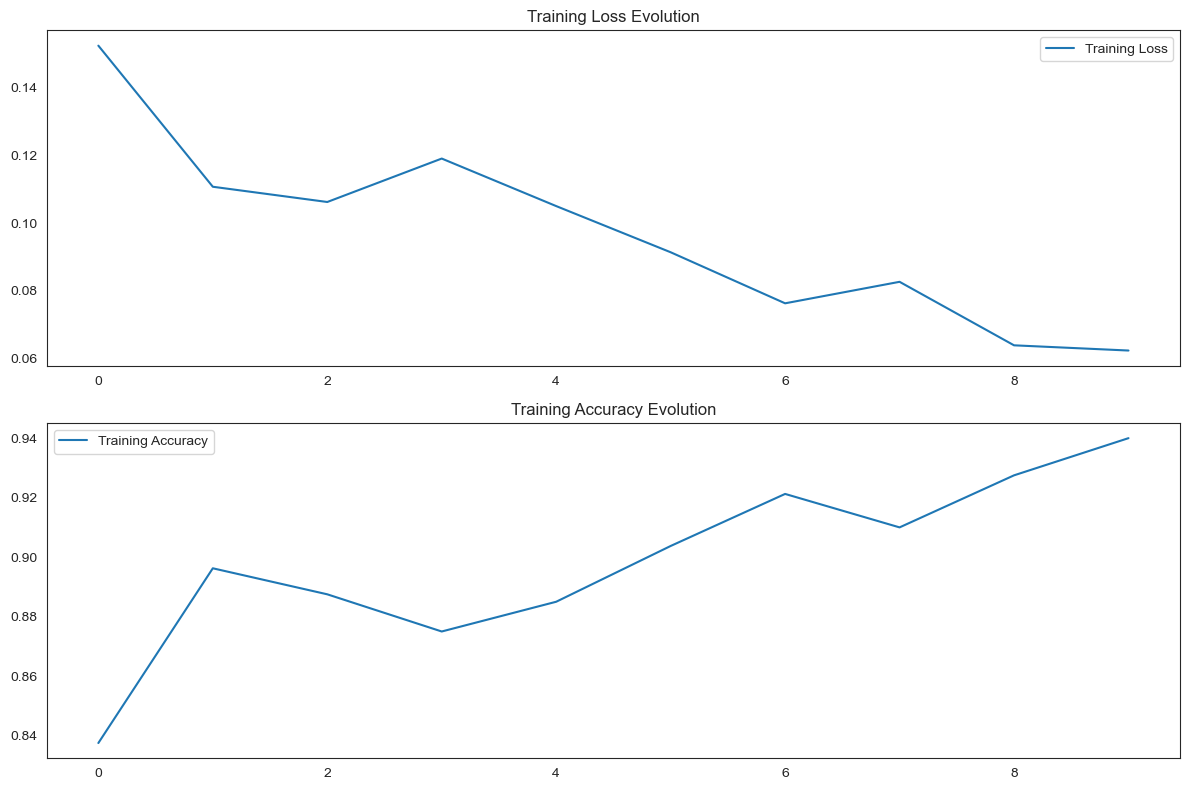

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(r.history['loss'], label='Training Loss')
plt.legend()
plt.title('Training Loss Evolution')

plt.subplot(2, 1, 2)
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.legend()
plt.title('Training Accuracy Evolution')

plt.tight_layout()
plt.show()
